In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
df = pd.read_csv("redfin_2020-05-12-07-27-57.csv")

In [3]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [4]:
gdf.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE',
       'geometry'],
      dtype='object')

<IPython.core.display.Javascript object>


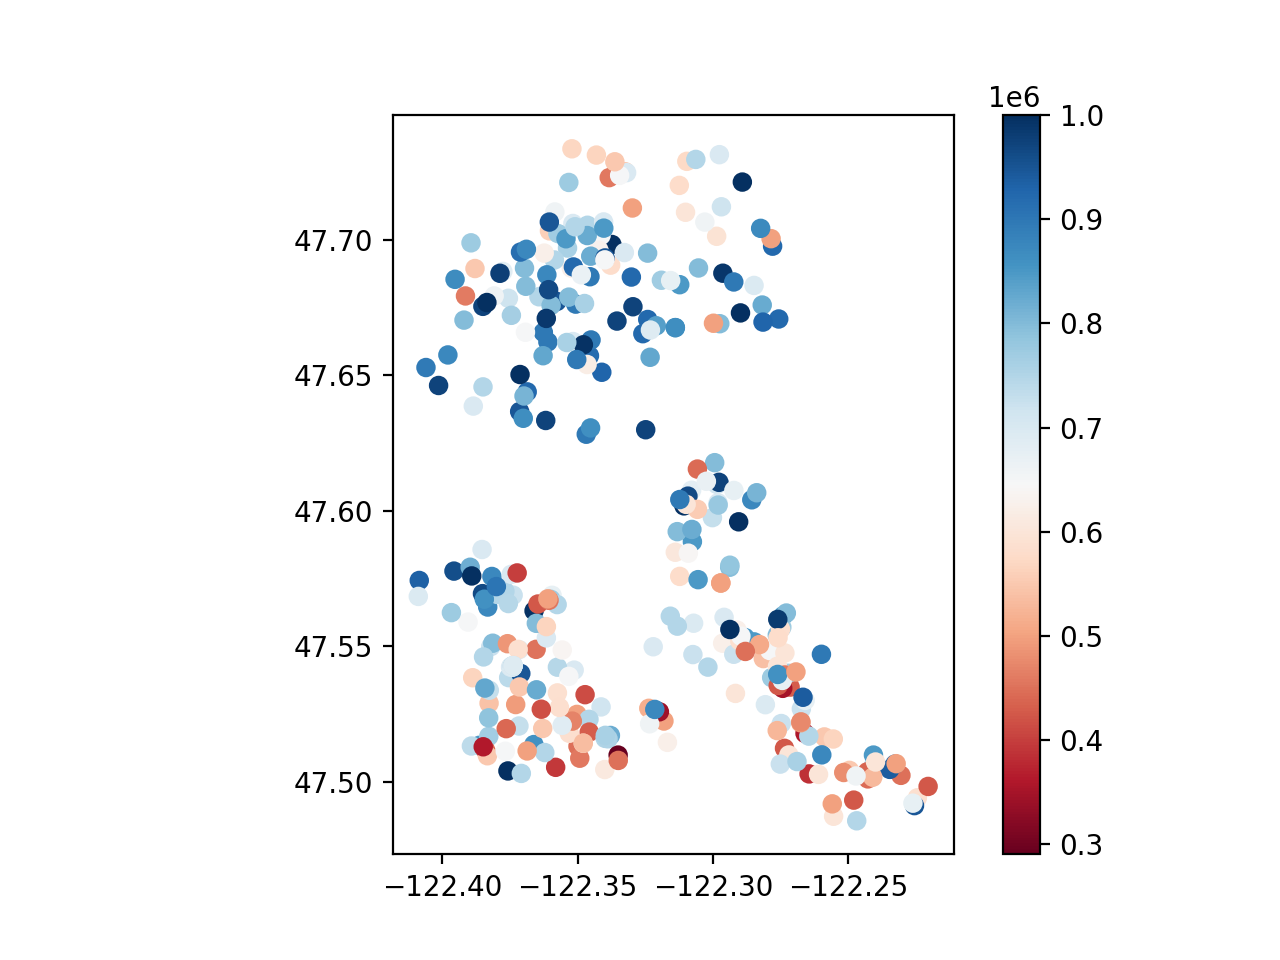

In [5]:
gdf.plot(column='PRICE', cmap='RdBu', legend=True)


In [6]:
df_neighborhood = gpd.read_file("City_Clerk_Neighborhoods (1).geojson")
df_neighborhood.head()

OBJECTID  PERIMETER S_HOOD L_HOOD  L_HOODID  SYMBOL  SYMBOL2       AREA  \
0         1    617.843    OOO                0       0        0   3588.443   
1         2    733.568    OOO                0       0        0  22294.777   
2         3   4088.442    OOO                0       0        0  56695.367   
3         4   1809.446    OOO                0       0        0  64156.813   
4         5    250.330    OOO                0       0        0   2993.164   

   HOODS_  HOODS_ID  SHAPE_Length    SHAPE_Area  \
0       2         0    617.842614   3588.442385   
1       3         0    733.568416  22294.781706   
2       5         0   4088.441739  56695.357490   
3       6         0   1809.445748  64156.821780   
4       7         0    250.330362   2993.161328   

                                            geometry  
0  POLYGON ((-122.27398 47.69523, -122.27407 47.6...  
1  POLYGON ((-122.28756 47.64523, -122.28754 47.6...  
2  POLYGON ((-122.39529 47.66514, -122.39540 47.6...  
3  POLYGON ((-122.39832 47.66609, -122.39830 47.6...  
4  POLYGON ((-122.28851 47.65630, -122.28847 47.6...

<IPython.core.display.Javascript object>


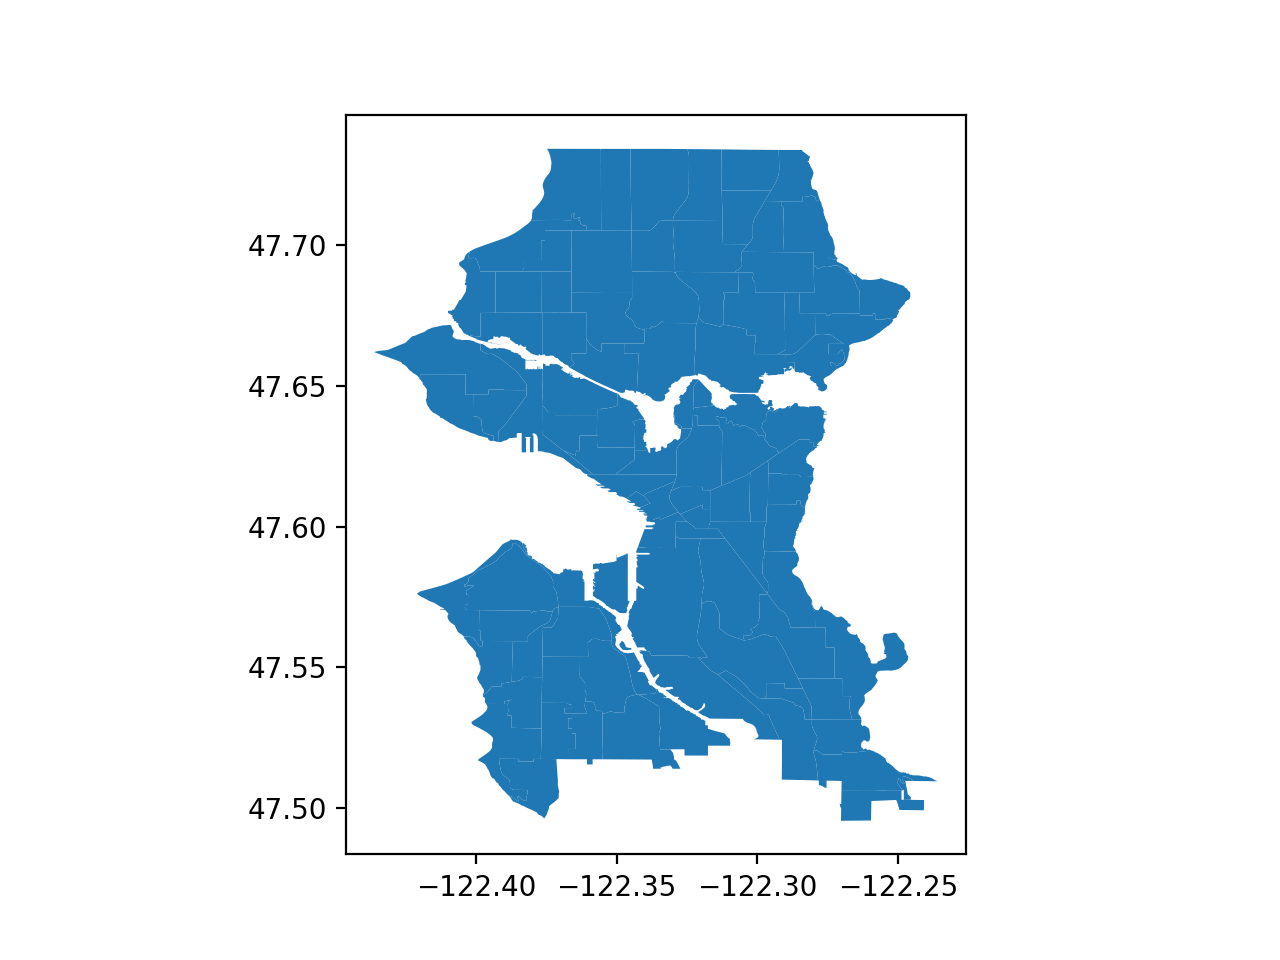

In [7]:
df_n_c = df_neighborhood.loc[df_neighborhood['S_HOOD'] != "OOO"]
df_n_c.plot()

In [8]:
df_n_c_small = df_n_c[['S_HOOD', 'geometry']]
df_n_c_small.head()

S_HOOD                                           geometry
26     Loyal Heights  POLYGON ((-122.37634 47.67592, -122.37652 47.6...
27             Adams  POLYGON ((-122.37634 47.67592, -122.37671 47.6...
28  Whittier Heights  POLYGON ((-122.37634 47.67592, -122.37608 47.6...
29     West Woodland  POLYGON ((-122.37634 47.67592, -122.37621 47.6...
30     Phinney Ridge  POLYGON ((-122.34731 47.66501, -122.34645 47.6...

In [9]:
#df_n_c_small.to_file("neighborhood2.json", driver='GeoJSON')


In [10]:
neighborhood_aggs = gpd.sjoin(df_n_c_small, gdf).groupby("S_HOOD").agg({'PRICE':'mean', 'DAYS ON MARKET':'mean', 
                                                                        'SQUARE FEET':'mean'})
neighborhood_aggs.head()

/opt/miniconda3/envs/data/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(epsg:4326 != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


PRICE  DAYS ON MARKET  SQUARE FEET
S_HOOD                                                   
Adams          887475.000000       14.500000  2245.000000
Alki           815000.000000       10.500000  1770.000000
Arbor Heights  654521.428571       44.142857  1701.857143
Atlantic       701663.333333       59.666667  1200.000000
Bitter Lake    698487.500000        9.250000  1697.500000

In [11]:
merged = df_n_c_small.merge(neighborhood_aggs, on='S_HOOD')
merged.head()

S_HOOD                                           geometry  \
0     Loyal Heights  POLYGON ((-122.37634 47.67592, -122.37652 47.6...   
1             Adams  POLYGON ((-122.37634 47.67592, -122.37671 47.6...   
2  Whittier Heights  POLYGON ((-122.37634 47.67592, -122.37608 47.6...   
3     West Woodland  POLYGON ((-122.37634 47.67592, -122.37621 47.6...   
4     Phinney Ridge  POLYGON ((-122.34731 47.66501, -122.34645 47.6...   

           PRICE  DAYS ON MARKET  SQUARE FEET  
0  722158.333333       25.166667  1518.666667  
1  887475.000000       14.500000  2245.000000  
2  772283.333333       21.000000  1620.000000  
3  840086.400000       43.400000  1679.800000  
4  824675.000000       50.125000  1913.375000

In [29]:
#merged.plot?

In [12]:
gdf.head()

SALE TYPE  SOLD DATE              PROPERTY TYPE              ADDRESS  \
0  MLS Listing        NaN  Single Family Residential     11210 81st Ave S   
1  MLS Listing        NaN  Single Family Residential  9516 Densmore Ave N   
2  MLS Listing        NaN  Single Family Residential      6543 1st Ave NW   
3  MLS Listing        NaN  Single Family Residential    10011 42nd Ave SW   
4  MLS Listing        NaN  Single Family Residential     3847 20th Ave SW   

      CITY STATE OR PROVINCE  ZIP OR POSTAL CODE   PRICE  BEDS  BATHS  ...  \
0  Seattle                WA               98178  450000     3   1.75  ...   
1  Seattle                WA               98103  999950     3   2.75  ...   
2  Seattle                WA               98117  950000     5   2.75  ...   
3  Seattle                WA               98146  849500     5   4.00  ...   
4  Seattle                WA               98106  675000     2   1.00  ...   

  NEXT OPEN HOUSE START TIME  NEXT OPEN HOUSE END TIME  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   

   URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)  \
0  http://www.redfin.com/WA/Seattle/11210-81st-Av...                                            
1  http://www.redfin.com/WA/Seattle/9516-Densmore...                                            
2  http://www.redfin.com/WA/Seattle/6543-1st-Ave-...                                            
3  http://www.redfin.com/WA/Seattle/10011-42nd-Av...                                            
4  http://www.redfin.com/WA/Seattle/3847-20th-Ave...                                            

   SOURCE     MLS#  FAVORITE  INTERESTED   LATITUDE   LONGITUDE  \
0   NWMLS  1598163         N           Y  47.502343 -122.230636   
1   NWMLS  1597657         N           Y  47.698327 -122.337338   
2   NWMLS  1596300         N           Y  47.677288 -122.357683   
3   NWMLS  1596374         N           Y  47.513424 -122.386273   
4   NWMLS  1595855         N           Y  47.568815 -122.359434   

                      geometry  
0  POINT (-122.23064 47.50234)  
1  POINT (-122.33734 47.69833)  
2  POINT (-122.35768 47.67729)  
3  POINT (-122.38627 47.51342)  
4  POINT (-122.35943 47.56882)  

[5 rows x 28 columns]

<IPython.core.display.Javascript object>


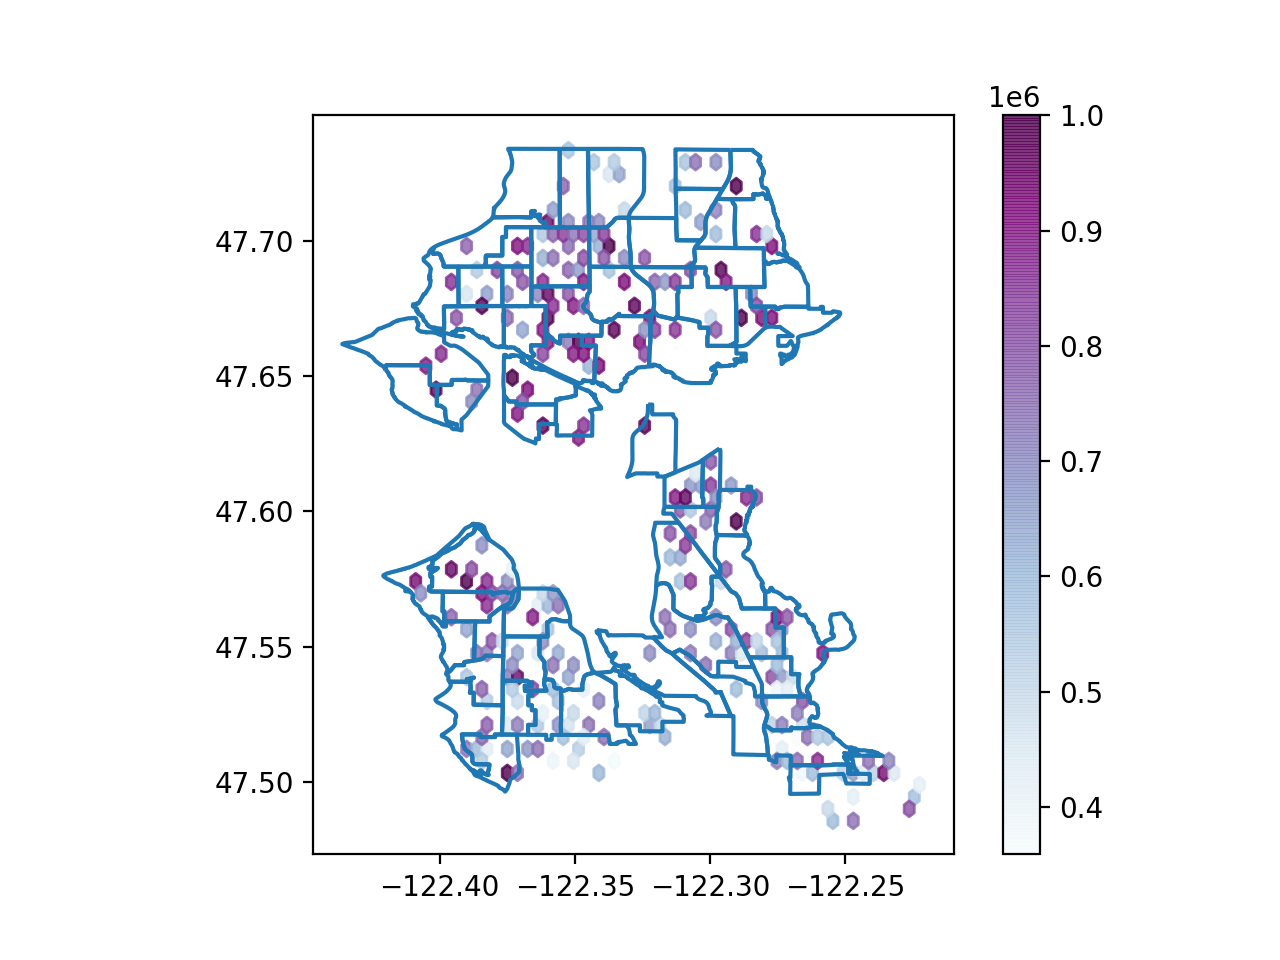

In [21]:
import numpy as np
%matplotlib notebook


f, ax = plt.subplots()
merged.boundary.plot(ax=ax)
hexbin = plt.hexbin(gdf['geometry'].x, gdf['geometry'].y, gridsize=50, alpha=0.8, 
           cmap='BuPu', C=gdf['PRICE'], reduce_C_function=np.median)
plt.colorbar(hexbin)


<IPython.core.display.Javascript object>


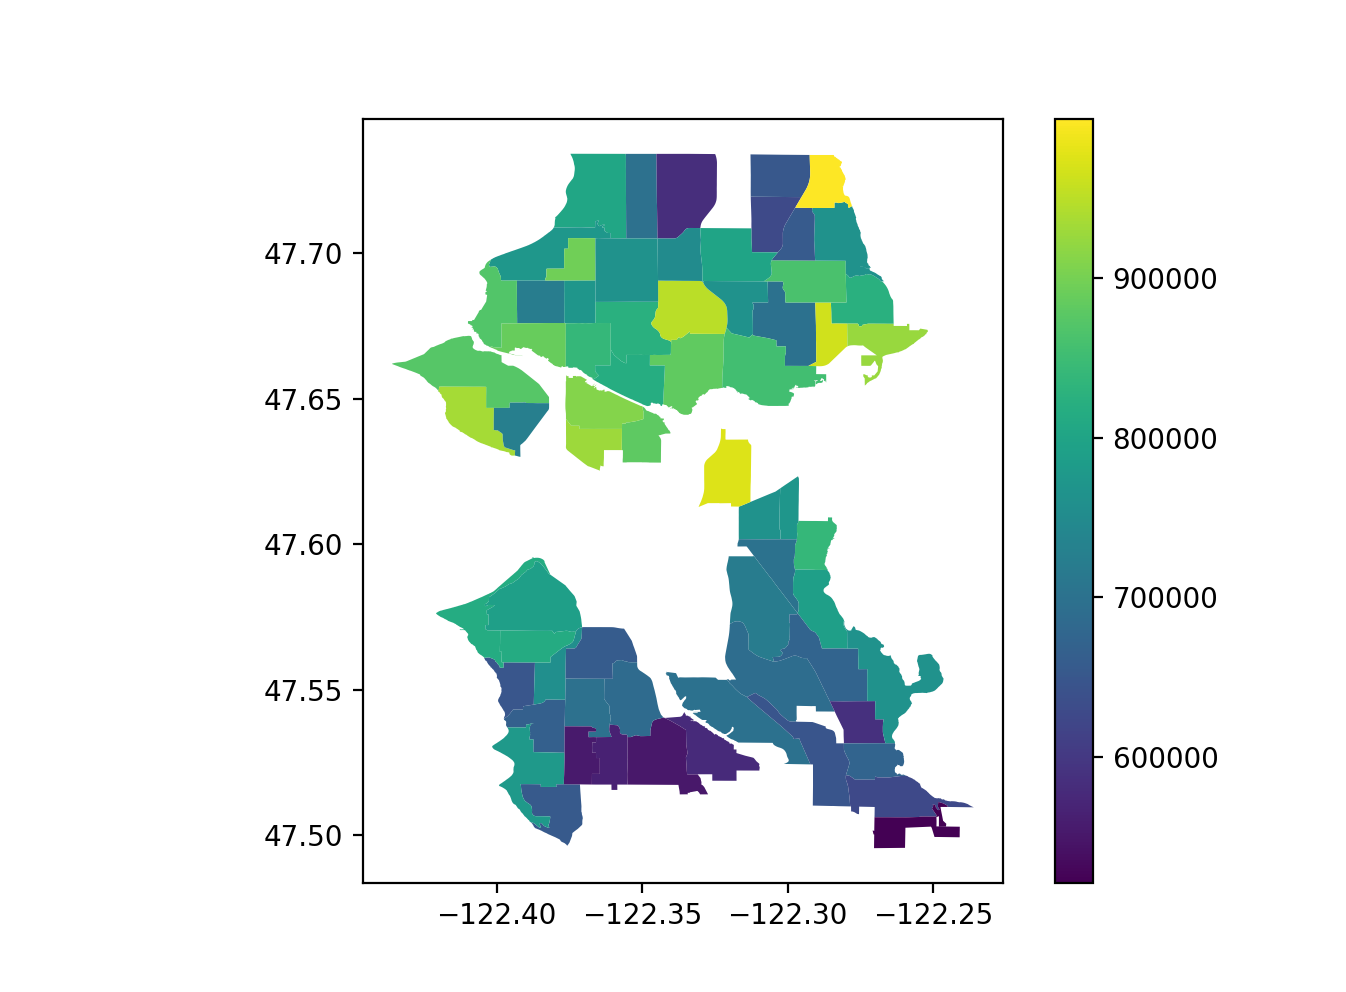

In [12]:
# plot = merged.plot(column='PRICE', legend=True)
# fig = plot.get_figure()
# fig.savefig("Price.png")

merged.plot(column='PRICE', legend=True)

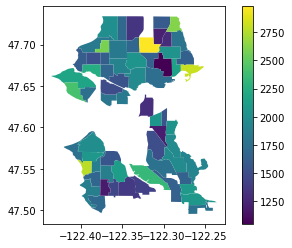

In [36]:
plot = merged.plot(column='SQUARE FEET', legend=True)
fig = plot.get_figure()
fig.savefig("SquareFeet.png")

#merged.plot(column='SQUARE FEET', legend=True)

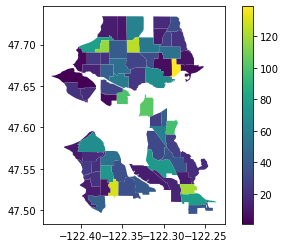

In [37]:
plot = merged.plot(column='DAYS ON MARKET', legend=True)
fig = plot.get_figure()
fig.savefig("DaysOnMarket.png")


# merged.plot(column='DAYS ON MARKET', legend=True)

In [13]:
import pandas as pd
df = pd.read_csv('redfin_2020-05-12-07-27-57.csv')

import plotly.express as px
fig = px.density_mapbox(df, lat='LATITUDE', lon='LONGITUDE', z='PRICE', radius=10,
                        center=dict(lat=47.62, lon=-122.3), zoom=10,
                        mapbox_style="stamen-terrain")
fig.show()

In [12]:
from urllib.request import urlopen
import json
with open("neighborhood2.json") as json_file:
    neighborhood = json.load(json_file)

import pandas as pd
df = pd.read_csv("redfin_2020-05-12-07-27-57.csv")
small = df[['LOCATION', 'PRICE']]
df_new = pd.DataFrame(small.groupby(['LOCATION']).mean()).reset_index()

import plotly.express as px

fig = px.choropleth_mapbox(df_new, geojson=neighborhood, locations='LOCATION', 
                           color='PRICE',
                           featureidkey='properties.S_HOOD',
                           color_continuous_scale="Viridis",
#                            range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 47.62, "lon": -122.3},
                           opacity=0.5,
                           labels={'PRICE':'PRICE'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [25]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

# import plotly.express as px

# fig = px.choropleth_mapbox(df, geojson=counties, locations='fips', color='unemp',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            mapbox_style="carto-positron",
#                            zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
#                            opacity=0.5,
#                            labels={'unemp':'unemployment rate'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [26]:
df.head()

fips  unemp
0  01001    5.3
1  01003    5.4
2  01005    8.6
3  01007    6.6
4  01009    5.5

In [27]:
counties

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEO_ID': '0500000US01001',
    'STATE': '01',
    'COUNTY': '001',
    'NAME': 'Autauga',
    'LSAD': 'County',
    'CENSUSAREA': 594.436},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-86.496774, 32.344437],
      [-86.717897, 32.402814],
      [-86.814912, 32.340803],
      [-86.890581, 32.502974],
      [-86.917595, 32.664169],
      [-86.71339, 32.661732],
      [-86.714219, 32.705694],
      [-86.413116, 32.707386],
      [-86.411172, 32.409937],
      [-86.496774, 32.344437]]]},
   'id': '01001'},
  {'type': 'Feature',
   'properties': {'GEO_ID': '0500000US01009',
    'STATE': '01',
    'COUNTY': '009',
    'NAME': 'Blount',
    'LSAD': 'County',
    'CENSUSAREA': 644.776},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-86.577799, 33.765316],
      [-86.759144, 33.840617],
      [-86.953664, 33.815297],
      [-86.954305, 33.844862],
      [-86.96296, 33.844865],
      [-86.9